#  Sytematic Review for "Gateway to the perspectives of the Food-Energy-Water Nexus"

If you have any questions please contact Kyle Proctor (proctork@oregonstate.edu)

This code was used to conduct a systematic review to identify publishing trends related to the FEW nexus. The review looked at how the quantity of FEW nexus studies has changed over the years, where those studies were coming from, and which journals they were being published. 

The analysis was conducted using the Pyscopus plugin for python (http://zhiyzuo.github.io/python-scopus/). Pyscopus is a wrapper for the scopus API; the world’s largest database of peer reviewed literature. 

## use of this code requires a scopus API KEY 
scopus API keys can be obtained at this link (https://dev.elsevier.com/) a variable named key must then be created which is the value of this scopus key enclosed in single quotation marks
for example : key = ' yourscoupuskeyhere'

The analysis here will produce all papers which matches the corresponding keywords and was produced in 2011 or later. The Analysis used in the journal article was conducted at the end of July and thus shows all papers produced before August 1st 2019
The major work here is done by the pyscopus software which returns a dataframe with all of the papers, the remainder of the code is data manipulation for visualization

In [1]:
#Install and import pyscopus plug in and other usefull libraries
# note that if numpy, pandas, or matplotlib are not already installed they will need to be, the same procedure shown here can be used
import sys
!{sys.executable} -m pip install pyscopus
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install openpyxl
import pyscopus
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
#input scopus API key (get one here https://dev.elsevier.com/)
from pyscopus import Scopus
key=' ' # you need to enter your own scopus API key here
scopus= Scopus(key);


In [3]:
#This function is where all the analysis is conducted, It produces 2 charts and 3 tables. 
# Chart 1 The papers published by year and corresponding table
# Chart 2 The papers publihed by country and corresponding table
# Table 3 The papers published by Journal name
# The function can be used on any dataset produced by pyscopus


def Systematic_Review(Search_Dataset): # Search_Dataset set will be the results from pyscopus
    
    # these lines convert the cover date of the article into simply the year of the article and convert from str type
    # to intereger for later analysis     
    cover_date=Search_Dataset['cover_date']
    pubYear=cover_date.str.split('-',n=1, expand=True)
    Search_Dataset['cover_date']=pubYear
    year=Search_Dataset['cover_date'].astype(int)
    publisherData=Search_Dataset['publication_name'] # aquire Name of Journal article was published in
   
    # The affiliation column has a large amount of information about 
    # where the paper came from, university, city, etc. in this case we only want information about the 
    # Country of the first Authors institution, these lines get that data and save it as CD
    location=Search_Dataset['affiliation']
    location = location.astype(str)
    location.dropna(inplace = True) 
    country=location.str.split("country",n=1,expand=True)
    country1=country[1]
    countryT=country1.str.split("}",n=1,expand=True)
    CountryData=countryT[0]
    CD=CountryData.str.slice(4, -1)
    CD=CD[CD!='on'] #removing any areas which have "none" listed as the country  
    
    # create a table showing how many papers were published each year
    pub_count=year.value_counts() #Count of how many publications were published each year
    pub_Perc=pub_count/len(year) # percentage of publications published in this year
    Year_published = np.transpose(np.array(pub_Perc.index)) 
    pub_table=pd.DataFrame(np.c_[Year_published,pub_count,pub_Perc],columns=["Year","count","percent"]) 
    
    # plot histogram of publications by year
    plt.title('Publications by Year')
    plt.xlabel('Year')
    plt.ylabel('# of publications')
    
    # Ensure that each year has its own Bin, starting from 2011 until the current year - note if the search
    # timeframe is changed these lines must also be
    bins=np.linspace(2011,(max(year)+1),(max(year)-2011+2)) 
    plt.xticks(bins)
    hist=plt.hist(year,bins=bins ,rwidth=0.5)
    plt.xlim([2010,(max(year)+1)])
    plt.show()
    
    display(pub_table)
    
    
    
    #plot the number of publications coming from different countries
    plt.figure(figsize=(11,11))
    plt.title('Publications by Country')
    plt.xlabel('Country of First Author institution')
    plt.ylabel('# of publications')
    Country_plot=pd.Series(CD).value_counts().plot('bar')
    plt.show()
    
    #Create a table with the papers published from each country
    #this table is not displayed because it is very large, to display simply uncomment
    CD_count=CD.value_counts()
    CD_index= np.transpose(np.array(CD_count.index))
    CD_Perc=CD_count/len(CD)
    CD_table=pd.DataFrame(np.c_[CD_index,CD_count,CD_Perc],columns=["Country","count","percent"])
    #display(CD_table)
    
    # Create a table with the papers published in each Journal
    
    JCount=publisherData.value_counts()
    JPerc=publisherData.value_counts()/len(CD)
    JIndex=np.transpose(np.array(JCount.index))
    JournalTable=pd.DataFrame(np.c_[JIndex,JCount,JPerc], columns=['Journal Name',"count","percent"])
    display(JournalTable)

    

In [4]:

# This is where the search for papers occures, details on the Keywords used here are in the text
#D etails about the search syntax detailed here (https://dev.elsevier.com/tips/ScopusSearchTips.htm)

mainDataSet = scopus.search("TITLE-ABS-KEY(Nexus w/10 Energy AND Water w/10 food) OR TITLE-ABS-KEY(Nexus w/10 food AND energy w/10 food)   PUBYEAR > 2010", count=1000, view='STANDARD')

In [5]:
pd.set_option('display.max_colwidth', -1) # ensure full values can be seen
display(mainDataSet) 

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85068262140,The politics of the nexus in the city of Amsterdam,Cities,02642751,None,None,95,None,2019-12-01,10.1016/j.cities.2019.102388,0,"[{'name': 'Wageningen University and Research Centre', 'city': 'Wageningen', 'country': 'Netherlands'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0264275118307637
1,85068875520,"Sustainability of safe foods: Joint environmental, economic and microbial load reduction assessment of antimicrobial systems in U.S. beef processing",Science of the Total Environment,00489697,None,18791026,691,252-262,2019-11-15,10.1016/j.scitotenv.2019.07.064,0,"[{'name': 'University of Nebraska - Lincoln', 'city': 'Lincoln', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719331778
2,85068416894,Water diplomacy and nexus governance in a transboundary context: In the search for complementarities,Science of the Total Environment,00489697,None,18791026,690,85-96,2019-11-10,10.1016/j.scitotenv.2019.06.513,0,"[{'name': 'Cranfield University', 'city': 'Cranfield', 'country': 'United Kingdom'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719330864
3,85068253955,Structuring an integrated water-energy-food nexus assessment of a local wind energy desalination system for irrigation,Science of the Total Environment,00489697,None,18791026,689,945-957,2019-11-01,10.1016/j.scitotenv.2019.06.422,0,"[{'name': 'UAB Institut de Ciència i Tecnologia Ambientals', 'city': 'Cerdanyola del Valles', 'country': 'Spain'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S004896971932995X
4,85068390738,Potential of technology parks to implement Roof Mosaic in Brazil,Journal of Cleaner Production,09596526,None,None,235,166-177,2019-10-20,10.1016/j.jclepro.2019.06.214,0,"[{'name': 'Universidade Federal de Sao Carlos', 'city': 'Sao Carlos', 'country': 'Brazil'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0959652619321754
5,85068398667,"Understanding the tele-coupling mechanism of urban food-energy-water nexus: Critical sources, nodes, and supply chains",Journal of Cleaner Production,09596526,None,None,235,297-307,2019-10-20,10.1016/j.jclepro.2019.06.232,0,"[{'name': 'Beijing Normal University', 'city': 'Beijing', 'country': 'China'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0959652619321973
6,85067810111,Uncovering urban food-energy-water nexus based on physical input-output analysis: The case of the Detroit Metropolitan Area,Applied Energy,03062619,None,None,252,None,2019-10-15,10.1016/j.apenergy.2019.113422,0,"[{'name': 'University of Michigan, Ann Arbor', 'city': 'Ann Arbor', 'country': 'United States'}, {'name': 'Beijing Normal University', 'city': 'Beijing', 'country': 'China'}, {'name': 'China University of Petroleum - Beijing', 'city': 'Beijing', 'country': 'China'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0306261919310967
7,85067357534,Water-energy-food nexus of bioethanol in Pakistan: A life cycle approach evaluating footprint indicators and energy performance,Science of the Total Environment,00489697,None,18791026,687,867-876,2019-10-15,10.1016/j.scitotenv.2019.05.465,0,"[{'name': 'King Mongkuts University of Technology Thonburi', 'city': 'Bangkok', 'country': 'Thailand'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719325239
8,85067243362,Mathematical modeling suggests high potential for the deployment of floating photovoltaic on fish ponds,Science of the Total Environment,00489697,None,18791026,687,654-666,2019-10-15,10.1016/j.scitotenv.2019.05.420,0,"[{'name': 'National Taiwan University', 'city': 'Taipei', 'country': 'Taiwan'}]",Journal,Article,[],https://api.elsevier.com/content/article/

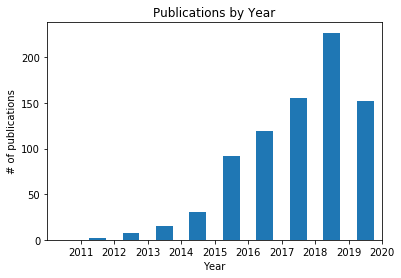

,Year,count,percent
0,2018.0,227.0,0.284105
1,2017.0,155.0,0.193992
2,2019.0,152.0,0.190238
3,2016.0,119.0,0.148936
4,2015.0,92.0,0.115144
5,2014.0,30.0,0.037547
6,2013.0,15.0,0.018773
7,2012.0,7.0,0.008761
8,2011.0,2.0,0.002503


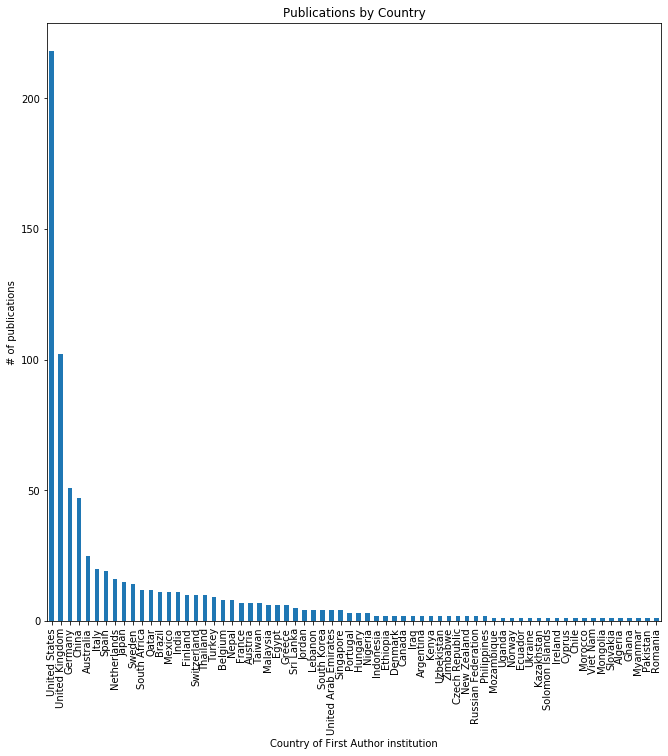

,Journal Name,count,percent
0,Water (Switzerland),33,0.0413016
1,Science of the Total Environment,30,0.0375469
2,Journal of Cleaner Production,26,0.0325407
3,Frontiers in Environmental Science,25,0.0312891
4,Environmental Science and Policy,24,0.0300375
5,Sustainability (Switzerland),18,0.0225282
6,Applied Energy,18,0.0225282
7,Water International,17,0.0212766
8,Journal of Environmental Studies and Sciences,14,0.0175219
9,Computer Aided Chemical Engineering,14,0.0175219


In [6]:
Systematic_Review(mainDataSet)

## Ecosystem Perspective 

In [7]:
EcosystemDS= scopus.search("TITLE-ABS-KEY(Nexus w/10 Energy AND Water w/10 food) OR TITLE-ABS-KEY(Nexus w/10 food AND energy w/10 food) AND (KEY(LCA) OR KEY(ecosystem) OR KEY(ecological indicators))  PUBYEAR > 2010", count=1000, view='STANDARD')
display(EcosystemDS)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85068875520,"Sustainability of safe foods: Joint environmental, economic and microbial load reduction assessment of antimicrobial systems in U.S. beef processing",Science of the Total Environment,00489697,None,18791026,691,252-262,2019-11-15,10.1016/j.scitotenv.2019.07.064,0,"[{'name': 'University of Nebraska - Lincoln', 'city': 'Lincoln', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719331778
1,85067357534,Water-energy-food nexus of bioethanol in Pakistan: A life cycle approach evaluating footprint indicators and energy performance,Science of the Total Environment,00489697,None,18791026,687,867-876,2019-10-15,10.1016/j.scitotenv.2019.05.465,0,"[{'name': 'King Mongkuts University of Technology Thonburi', 'city': 'Bangkok', 'country': 'Thailand'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719325239
2,85067578221,Water-energy-food nexus: A case study on medicinal and aromatic plants,Journal of Cleaner Production,09596526,None,None,233,1334-1343,2019-10-01,10.1016/j.jclepro.2019.06.065,0,"[{'name': 'Cyprus University of Technology', 'city': 'Limassol', 'country': 'Cyprus'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0959652619320189
3,85065476817,Considering agricultural wastes and ecosystem services in Food-Energy-Water-Waste Nexus system design,Journal of Cleaner Production,09596526,None,None,228,941-955,2019-08-10,10.1016/j.jclepro.2019.04.314,0,"[{'name': 'Northwestern University', 'city': 'Evanston', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0959652619314118
4,85068924403,Distinguishing Environmental Impacts of Household Food-Spending Patterns Among U.S. Demographic Groups,Environmental Engineering Science,10928758,None,15579018,36,763-777,2019-07-01,10.1089/ees.2018.0433,1,"[{'name': 'University of Illinois at Chicago', 'city': 'Chicago', 'country': 'United States'}]",Journal,Article,[],None
5,85062324678,State of future water regimes in the world’s river basins: balancing the water between society and nature,Critical Reviews in Environmental Science and Technology,10643389,None,15476537,49,1107-1133,2019-06-18,10.1080/10643389.2019.1579621,1,"[{'name': 'Nanjing Institute of Geography and Limnology Chinese Academy of Sciences', 'city': 'Nanjing', 'country': 'China'}, {'name': 'University of Melbourne', 'city': 'Parkville', 'country': 'Australia'}, {'name': 'Tsinghua University', 'city': 'Beijing', 'country': 'China'}]",Journal,Article,[],None
6,85068830423,Payment for ecosystem services and the water-energy-food nexus: Securing resource flows for the affluent?,Water (Switzerland),None,None,20734441,11,None,2019-06-01,10.3390/w11061143,0,"[{'name': 'Deutsches Institut fur Entwicklungspolitik', 'city': 'Bonn', 'country': 'Germany'}]",Journal,Article,[],None
7,85067293065,Evaluating the thermal performance ofwet swales housing ground source heat pump elements through laboratory modelling,Sustainability (Switzerland),None,None,20711050,11,None,2019-06-01,10.3390/su11113118,0,"[{'name': 'Universidad de Oviedo', 'city': 'Oviedo', 'country': 'Spain'}]",Journal,Article,[],None
8,85062782379,Valuation of ecosystem services in alternative bioenergy landscape scenarios,GCB Bioenergy,17571693,None,17571707,11,748-762,2019-06-01,10.1111/gcbb.12602,0,"[{'name': 'Argonne National Laboratory', 'city': 'Argonne', 'country': 'United States'}]",Journal,Article,[],None
9,85064069666,Temporal-spatial changes about the landscape pattern of water system and their relationship with food and energy in a mega city in China,Ecological Modelling,03043800,None,None,401,75-84,2019-06-01,10.1016/j.ecolmodel.2019.02.010,0,"[{'name': 'Beijing University Of Civil Engineering And Architecture', 'city': 'B

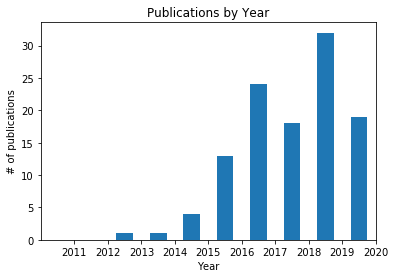

,Year,count,percent
0,2018.0,32.0,0.285714
1,2016.0,24.0,0.214286
2,2019.0,19.0,0.169643
3,2017.0,18.0,0.160714
4,2015.0,13.0,0.116071
5,2014.0,4.0,0.035714
6,2013.0,1.0,0.008929
7,2012.0,1.0,0.008929


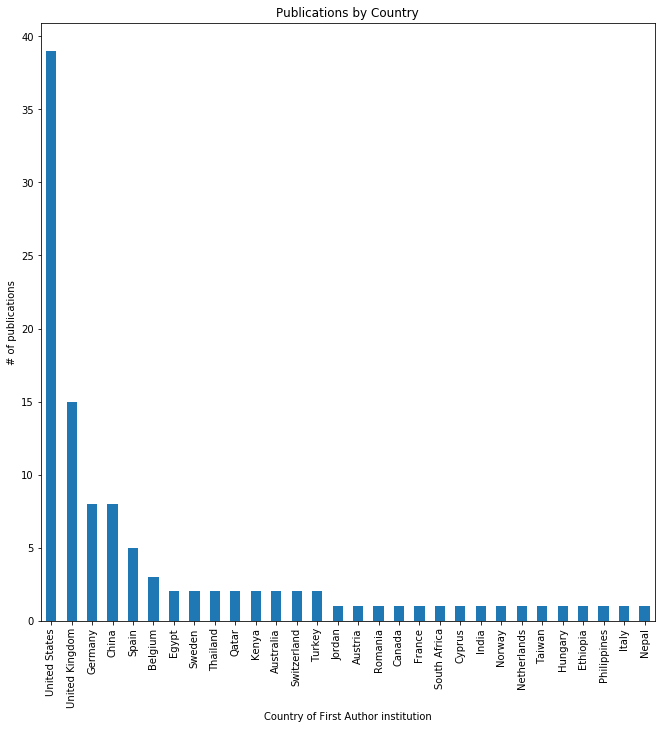

,Journal Name,count,percent
0,Science of the Total Environment,9,0.0803571
1,Journal of Cleaner Production,9,0.0803571
2,Ecosystem Services,5,0.0446429
3,Water (Switzerland),5,0.0446429
4,Environmental Science and Policy,4,0.0357143
5,Current Opinion in Environmental Sustainability,4,0.0357143
6,Sustainability (Switzerland),4,0.0357143
7,Applied Energy,3,0.0267857
8,Environmental Research Letters,3,0.0267857
9,Computer Aided Chemical Engineering,3,0.0267857


In [8]:
Systematic_Review(EcosystemDS)

## Waste Management Perspective

In [9]:
WasteDS= scopus.search("TITLE-ABS-KEY(Nexus w/10 food AND Energy w/10 Water) AND (KEY(Waste) OR KEY(Circular Economy)) PUBYEAR > 2010", count=1000, view='STANDARD')
display(WasteDS)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85065476817,Considering agricultural wastes and ecosystem services in Food-Energy-Water-Waste Nexus system design,Journal of Cleaner Production,09596526,None,None,228,941-955,2019-08-10,10.1016/j.jclepro.2019.04.314,0,"[{'name': 'Northwestern University', 'city': 'Evanston', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0959652619314118
1,85064202810,Quantification of interlinked environmental footprints on a sustainable university campus: A nexus analysis perspective,Applied Energy,03062619,None,None,None,65-76,2019-07-15,10.1016/j.apenergy.2019.04.015,0,"[{'name': 'Tongji University', 'city': 'Shanghai', 'country': 'China'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S030626191930635X
2,85065736923,A Uniform Practice for Conceptualizing and Communicating Food-Energy-Water Nexus Studies,Earth's Future,None,None,23284277,7,504-515,2019-05-01,10.1029/2019EF001150,0,"[{'name': 'Sandia National Laboratories, New Mexico', 'city': 'Albuquerque', 'country': 'United States'}]",Journal,Note,[],None
3,85062735041,Learning from integrated management approaches to implement the Nexus,Journal of Environmental Management,03014797,None,10958630,237,609-616,2019-05-01,10.1016/j.jenvman.2019.02.106,1,"[{'name': 'United Nations University Institute for Integrated Management of Material Fluxes and of Resources (UNU-FLORES)', 'city': 'Dresden', 'country': 'Germany'}]",Journal,Review,[],https://api.elsevier.com/content/article/eid/1-s2.0-S030147971930266X
4,85058184908,Food-energy-water (FEW) nexus for urban sustainability: A comprehensive review,"Resources, Conservation and Recycling",09213449,None,18790658,None,215-224,2019-03-01,10.1016/j.resconrec.2018.11.018,6,"[{'name': 'Beijing Normal University', 'city': 'Beijing', 'country': 'China'}]",Journal,Review,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0921344918304361
5,85052935689,Lessons learned: Creating an interdisciplinary team and using a nexus approach to address a resource hotspot,Science of the Total Environment,00489697,None,18791026,650,105-110,2019-02-10,10.1016/j.scitotenv.2018.08.406,1,"[{'name': 'American University of Beirut', 'city': 'Beirut', 'country': 'Lebanon'}, {'name': 'Texas A and M University', 'city': 'College Station', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969718333825
6,85060082502,Quantifying the Urban Food-Energy-Water Nexus: The Case of the Detroit Metropolitan Area,Environmental Science and Technology,0013936X,None,15205851,53,779-788,2019-01-15,10.1021/acs.est.8b06240,2,"[{'name': 'Beijing Normal University', 'city': 'Beijing', 'country': 'China'}]",Journal,Article,[],None
7,85050920210,Towards bridging the water gap in Texas: A water-energy-food nexus approach,Science of the Total Environment,00489697,None,18791026,647,449-463,2019-01-10,10.1016/j.scitotenv.2018.07.398,3,"[{'name': 'Texas A and M University', 'city': 'College Station', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969718328936
8,85059614858,Involving the Water-Energy-Food Nexus in Integrating Low-Income and Isolated Communities,ACS Sustainable Chemistry and Engineering,None,None,21680485,7,1399-1418,2019-01-07,10.1021/acssuschemeng.8b05134,1,"[{'name': 'Universidad Nacional Autónoma de México', 'city': 'Ciudad de México', 'country': 'Mexico'}]",Journal,Article,[],None
9,85053295789,Combined application of Life Cycle Assessment and linear programming to evaluate food waste-to-food strategies: Seeking for answers in the nexus approach,Waste Management,0956053X,None,18792456,80,186-197,2018-10-01,10.1016/j.wasman.2018.09.009,3,"[{'name': 'Universidad de Cantabria', 'city': 'Santander', 'country': 'Spain'}]",Journa

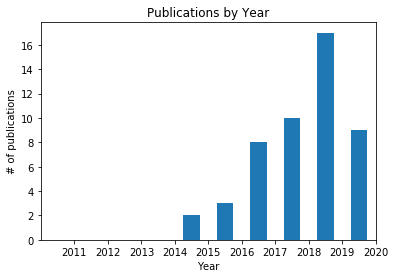

,Year,count,percent
0,2018.0,17.0,0.346939
1,2017.0,10.0,0.204082
2,2019.0,9.0,0.183673
3,2016.0,8.0,0.163265
4,2015.0,3.0,0.061224
5,2014.0,2.0,0.040816


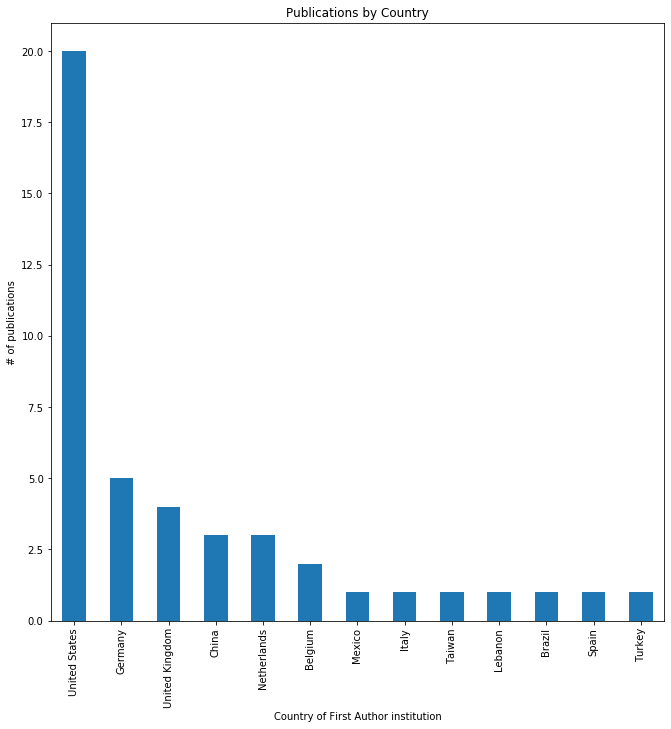

,Journal Name,count,percent
0,Waste Management,3,0.0612245
1,Environmental Science and Technology,3,0.0612245
2,Journal of Cleaner Production,3,0.0612245
3,Science of the Total Environment,3,0.0612245
4,Environmental Science and Policy,3,0.0612245
5,Energy and Fuels,2,0.0408163
6,Journal of Environmental Management,2,0.0408163
7,"Resources, Conservation and Recycling",2,0.0408163
8,Applied Energy,2,0.0408163
9,Meet the Faculty Candidate Poster Session 2016 - Sponsored by the Education Division - Topical Conference at the 2016 AIChE Annual Meeting,1,0.0204082


In [10]:
Systematic_Review(WasteDS)

## Learing Process Perspective

In [11]:
LearningDS= scopus.search("TITLE-ABS-KEY(Nexus w/10 food AND Energy w/10 Water) AND TITLE-ABS-KEY(Learning Process OR Semiotic)  PUBYEAR > 2010", count=1000, view='STANDARD')
display(LearningDS)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85067255590,"Computational decision framework for enhancing resilience of the energy, water and food nexus in risky environments",Renewable and Sustainable Energy Reviews,13640321,None,18790690,None,653-668,2019-09-01,10.1016/j.rser.2019.06.015,0,"[{'name': 'Hamad Bin Khalifa University, College of Science and Engineering', 'city': 'Doha', 'country': 'Qatar'}]",Journal,Review,[],https://api.elsevier.com/content/article/eid/1-s2.0-S1364032119304083
1,85053777419,Re-framing the decision context over trade-offs among ecosystem services and wellbeing in a major river basin where water resources are highly contested,Sustainability Science,18624065,None,18624057,14,713-731,2019-05-07,10.1007/s11625-018-0630-x,0,"[{'name': 'Australian National University, Fenner School of Environment and Society', 'city': 'Canberra', 'country': 'Australia'}, {'name': 'CSIRO Land and Water', 'city': 'Highett VIC', 'country': 'Australia'}]",Journal,Article,[],None
2,85060470691,Power dynamics and integration in the water-energy-food nexus: Learning lessons for transdisciplinary research in Cambodia,Environmental Science and Policy,14629011,None,18736416,94,153-162,2019-04-01,10.1016/j.envsci.2019.01.010,0,"[{'name': 'Université de Genève', 'city': 'Geneva', 'country': 'Switzerland'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S1462901118309286
3,85063195809,Promoting climate change transformation with young people in Brazil: participatory action research through a looping approach,Action Research,14767503,None,17412617,17,87-107,2019-03-01,10.1177/1476750319829202,0,"[{'name': 'National Early Warning and Monitoring Center of Natural Disasters (Cemaden)', 'city': None, 'country': 'Brazil'}]",Journal,Article,[],None
4,85053653746,Participatory processes and integrated modelling supporting nexus implementations,"Managing Water, Soil and Waste Resources to Achieve Sustainable Development Goals: Monitoring and Implementation of Integrated Resources Management",None,"[{'@_fa': 'true', '$': '9783319751634'}, {'@_fa': 'true', '$': '9783319751627'}]",None,None,71-92,2018-04-13,10.1007/978-3-319-75163-4_4,2,"[{'name': 'Mekong Region Futures Institute', 'city': 'Bangkok', 'country': 'Thailand'}]",Book,Chapter,[],None
5,85039076304,An integrated assessment model for the German food-energy-water nexus,"Journal of Sustainable Development of Energy, Water and Environment Systems",None,None,18489257,6,1-12,2018-03-01,10.13044/j.sdewes.d5.0182,3,"[{'name': 'Forschungszentrum Jülich (FZJ)', 'city': 'Jülich', 'country': 'Germany'}]",Journal,Article,[],None
6,85041475963,Multi-stakeholder development of a serious game to explore the water-energy-food-land-climate nexus: The SIM4NEXUS approach,Water (Switzerland),None,None,20734441,10,None,2018-02-01,10.3390/w10020139,8,"[{'name': 'IHE Delft Institute for Water Education', 'city': 'Delft', 'country': 'Netherlands'}]",Journal,Article,[],None
7,85030536788,Educational immersive simulation game design to enhance understanding of corn-water-ethanol-beef system nexus,"ASEE Annual Conference and Exposition, Conference Proceedings",None,None,21535965,2017-June,None,2017-06-24,None,0,"[{'name': 'University of Nebraska', 'city': None, 'country': 'United States'}]",Conference Proceeding,Conference Paper,[],None
8,85048461038,Molecular modeling and machine learning for catalysis and separations,Education Division 2017 - Core Programming Area at the 2017 AIChE Annual Meeting,None,"[{'@_fa': 'true', '$': '9781510857933'}]",None,2017-October,375-376,2017-01-01,None,0,None,Conference Proceeding,Conference Paper,[],None
9,85052507986,Sustainable Engineering Forum 2017 - Core Programming Area at the 2017 AIChE Annual Meeting,Sustainable Engineering Forum 2017 - Core Programming Area at the 2017 AIChE Annual Meeting,None,"[{'@_fa': 'true', '$': '97

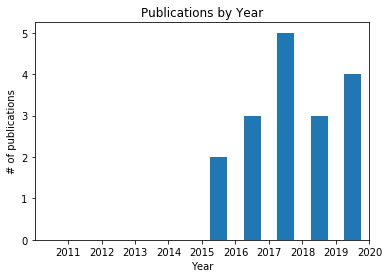

,Year,count,percent
0,2017.0,5.0,0.294118
1,2019.0,4.0,0.235294
2,2018.0,3.0,0.176471
3,2016.0,3.0,0.176471
4,2015.0,2.0,0.117647


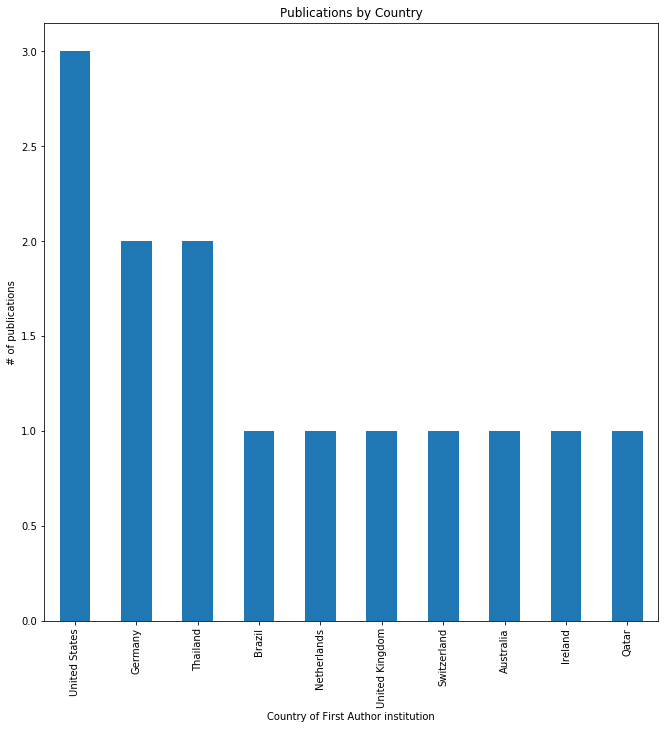

,Journal Name,count,percent
0,International Journal of Design and Nature and Ecodynamics,1,0.0588235
1,Handbook of Statistics,1,0.0588235
2,"IMCIC 2017 - 8th International Multi-Conference on Complexity, Informatics and Cybernetics, Proceedings",1,0.0588235
3,Flows and Practices: The Politics of Integrated Water Resources Management in Eastern and Southern Africa,1,0.0588235
4,Environmental Science and Policy,1,0.0588235
5,Water (Switzerland),1,0.0588235
6,Action Research,1,0.0588235
7,Renewable and Sustainable Energy Reviews,1,0.0588235
8,Education Division 2017 - Core Programming Area at the 2017 AIChE Annual Meeting,1,0.0588235
9,Journal of Environmental Management,1,0.0588235


In [13]:
Systematic_Review(LearningDS)

## Institutional Change Perspective

In [14]:
InstitutionalDS= scopus.search("KEY(policy OR institutions OR governance OR government)  AND TITLE-ABS-KEY(Nexus w/10 food AND Energy w/10 Water)  PUBYEAR > 2010", count=1000, view='STANDARD')
display(InstitutionalDS)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85068416894,Water diplomacy and nexus governance in a transboundary context: In the search for complementarities,Science of the Total Environment,00489697,None,18791026,690,85-96,2019-11-10,10.1016/j.scitotenv.2019.06.513,0,"[{'name': 'Cranfield University', 'city': 'Cranfield', 'country': 'United Kingdom'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969719330864
1,85066981547,Exposure of urban food–energy–water (FEW) systems to water scarcity,Sustainable Cities and Society,22106707,None,None,50,None,2019-10-01,10.1016/j.scs.2019.101621,1,"[{'name': 'University of Illinois at Urbana-Champaign', 'city': 'Urbana', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S2210670718325654
2,85065502031,Integration of greenhouse agriculture to the energy infrastructure as an alimentary solution,Renewable and Sustainable Energy Reviews,13640321,None,18790690,None,368-377,2019-08-01,10.1016/j.rser.2019.04.084,0,"[{'name': 'Lappeenrannan Teknillinen Yliopisto', 'city': 'Lappeenranta', 'country': 'Finland'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S1364032119303053
3,85064202810,Quantification of interlinked environmental footprints on a sustainable university campus: A nexus analysis perspective,Applied Energy,03062619,None,None,None,65-76,2019-07-15,10.1016/j.apenergy.2019.04.015,0,"[{'name': 'Tongji University', 'city': 'Shanghai', 'country': 'China'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S030626191930635X
4,85064042812,Development drivers of the water-energy-food nexus in the Gulf Cooperation Council region,Development in Practice,09614524,None,13649213,29,582-593,2019-07-04,10.1080/09614524.2019.1602109,1,None,Journal,Article,[],None
5,85064529702,Solar energy farming as a development innovation for vulnerable water basins,Development in Practice,09614524,None,13649213,29,619-634,2019-07-04,10.1080/09614524.2019.1600659,1,None,Journal,Article,[],None
6,85062608658,Re-distributed manufacturing and the food-water-energy nexus: opportunities and challenges,Production Planning and Control,09537287,None,13665871,30,593-609,2019-05-19,10.1080/09537287.2018.1540055,0,"[{'name': 'University of Oxford', 'city': 'Oxford', 'country': 'United Kingdom'}]",Journal,Article,[],None
7,85053777419,Re-framing the decision context over trade-offs among ecosystem services and wellbeing in a major river basin where water resources are highly contested,Sustainability Science,18624065,None,18624057,14,713-731,2019-05-07,10.1007/s11625-018-0630-x,0,"[{'name': 'Australian National University, Fenner School of Environment and Society', 'city': 'Canberra', 'country': 'Australia'}, {'name': 'CSIRO Land and Water', 'city': 'Highett VIC', 'country': 'Australia'}]",Journal,Article,[],None
8,85065208522,"Network governance and the Urban Nexus of water, energy, and food: Lessons from Amsterdam","Energy, Sustainability and Society",None,None,21920567,9,None,2019-05-02,10.1186/s13705-019-0196-1,0,"[{'name': 'Wageningen University and Research Centre', 'city': 'Wageningen', 'country': 'Netherlands'}]",Journal,Article,[],None
9,85062735041,Learning from integrated management approaches to implement the Nexus,Journal of Environmental Management,03014797,None,10958630,237,609-616,2019-05-01,10.1016/j.jenvman.2019.02.106,1,"[{'name': 'United Nations University Institute for Integrated Management of Material Fluxes and of Resources (UNU-FLORES)', 'city': 'Dresden', 'country': 'Germany'}]",Journal,Review,[],https://api.elsevier.com/content/article/eid/1-s2.0-S030147971930266X


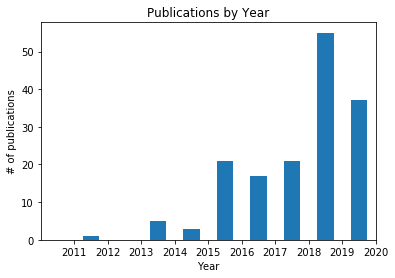

,Year,count,percent
0,2018.0,55.0,0.34375
1,2019.0,37.0,0.23125
2,2017.0,21.0,0.13125
3,2015.0,21.0,0.13125
4,2016.0,17.0,0.10625
5,2013.0,5.0,0.03125
6,2014.0,3.0,0.01875
7,2011.0,1.0,0.00625


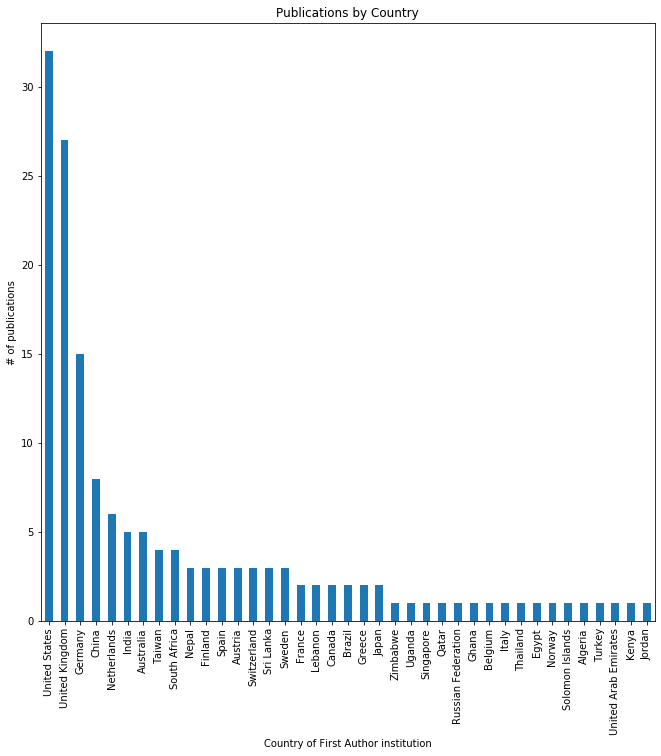

,Journal Name,count,percent
0,Environmental Science and Policy,17,0.10625
1,Science of the Total Environment,11,0.06875
2,Water (Switzerland),9,0.05625
3,Current Opinion in Environmental Sustainability,7,0.04375
4,Energy Policy,7,0.04375
5,Frontiers in Environmental Science,6,0.0375
6,Water International,4,0.025
7,Sustainability (Switzerland),4,0.025
8,International Journal of Water Resources Development,4,0.025
9,"Resources, Conservation and Recycling",3,0.01875


In [16]:
Systematic_Review(InstitutionalDS)

## Stakeholder Trust Perspective

In [17]:
TrustDS= scopus.search("KEY( Stakeholder) OR KEY(critical social science) AND TITLE-ABS-KEY(Nexus w/10 food AND Energy w/10 Water)  PUBYEAR > 2010", count=1000, view='STANDARD')
display(TrustDS)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85055025942,"Toward creating an environment of cooperation between water, energy, and food stakeholders in San Antonio",Science of the Total Environment,00489697,None,18791026,651,2913-2926,2019-02-15,10.1016/j.scitotenv.2018.09.395,2,"[{'name': 'Texas A and M University', 'city': 'College Station', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969718338221
1,85052935689,Lessons learned: Creating an interdisciplinary team and using a nexus approach to address a resource hotspot,Science of the Total Environment,00489697,None,18791026,650,105-110,2019-02-10,10.1016/j.scitotenv.2018.08.406,1,"[{'name': 'American University of Beirut', 'city': 'Beirut', 'country': 'Lebanon'}, {'name': 'Texas A and M University', 'city': 'College Station', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0048969718333825
2,85059614858,Involving the Water-Energy-Food Nexus in Integrating Low-Income and Isolated Communities,ACS Sustainable Chemistry and Engineering,None,None,21680485,7,1399-1418,2019-01-07,10.1021/acssuschemeng.8b05134,1,"[{'name': 'Universidad Nacional Autónoma de México', 'city': 'Ciudad de México', 'country': 'Mexico'}]",Journal,Article,[],None
3,85064395478,Stakeholder perspectives on sustainability in the food-energy-water nexus,Frontiers in Environmental Science,None,None,2296665X,7,None,2019-01-01,10.3389/fenvs.2019.00007,0,"[{'name': 'Ohio State University', 'city': 'Columbus', 'country': 'United States'}]",Journal,Article,[],None
4,85064624886,How methods for navigating uncertainty connect science and policy at the water-energy-food nexus,Frontiers in Environmental Science,None,None,2296665X,7,None,2019-01-01,10.3389/fenvs.2019.00037,0,"[{'name': 'University of Montana', 'city': 'Missoula', 'country': 'United States'}]",Journal,Article,[],None
5,85060125926,Soil erosion in East Africa: An interdisciplinary approach to realising pastoral land management change,Environmental Research Letters,17489318,None,17489326,13,None,2018-12-01,10.1088/1748-9326/aaea8b,2,"[{'name': 'University of Plymouth', 'city': 'Plymouth', 'country': 'United Kingdom'}]",Journal,Article,[],None
6,85057491191,"Interdependencies and Risk to People and Critical Food, Energy, and Water Systems: 2013 Flood, Boulder, Colorado, USA",Earth's Future,None,None,23284277,6,1616-1629,2018-11-01,10.1029/2018EF000984,0,"[{'name': 'National Renewable Energy Laboratory', 'city': 'Golden', 'country': 'United States'}, {'name': 'University of Chicago', 'city': 'Chicago', 'country': 'United States'}, {'name': 'National Center for Atmospheric Research', 'city': 'Boulder', 'country': 'United States'}]",Journal,Article,[],None
7,85058378770,Building Food Security in the Canadian Arctic through the Development of Sustainable Community Greenhouses and Gardening,Ecoscience,11956860,None,None,25,325-341,2018-10-01,10.1080/11956860.2018.1493260,2,"[{'name': 'Géosciences Montpellier', 'city': 'Montpellier', 'country': 'France'}, {'name': 'University of Montreal', 'city': 'Montreal', 'country': 'Canada'}]",Journal,Article,[],None
8,85053390696,Describing and visualizing a water-energy-food nexus system,Water (Switzerland),None,None,20734441,10,None,2018-09-14,10.3390/w10091245,0,"[{'name': 'Michigan State University', 'city': 'East Lansing', 'country': 'United States'}]",Journal,Article,[],None
9,85047275948,The water-energy-food nexus: A fuzzy-cognitive mapping approach to support nexus-compliant policies in Andalusia (Spain),Water (Switzerland),None,None,20734441,10,None,2018-05-19,10.3390/w10050664,1,"[{'name': 'Universidad Politécnica de Madrid', 'city': 'Madrid', 'country': 'Spain'}]",Journal,Article,[],None


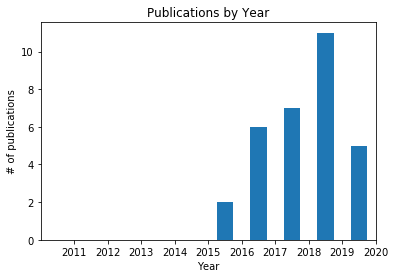

,Year,count,percent
0,2018.0,11.0,0.354839
1,2017.0,7.0,0.225806
2,2016.0,6.0,0.193548
3,2019.0,5.0,0.161290
4,2015.0,2.0,0.064516


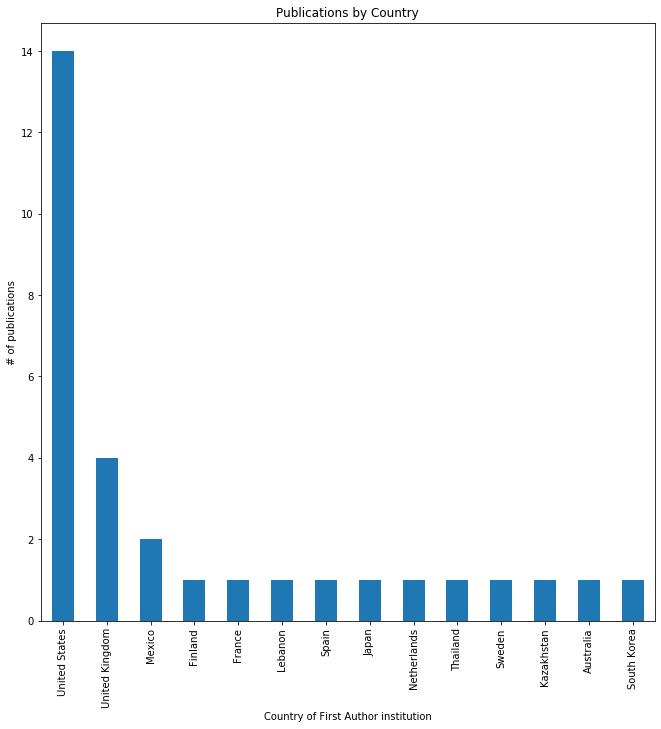

,Journal Name,count,percent
0,Water (Switzerland),6,0.193548
1,Journal of Environmental Studies and Sciences,4,0.129032
2,Frontiers in Environmental Science,3,0.0967742
3,Environmental Research Letters,2,0.0645161
4,Science of the Total Environment,2,0.0645161
5,Journal of Hydrology: Regional Studies,1,0.0322581
6,Water Policy,1,0.0322581
7,Water Alternatives,1,0.0322581
8,"Resilience to Climate Change: Communication, Collaboration and Co-production",1,0.0322581
9,Computers and Chemical Engineering,1,0.0322581


In [18]:
Systematic_Review(TrustDS)